#### IMPORTING MODULES

In [1]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')


import matplotlib
%matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt

import gensim
import nltk
import string

#stop-words
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))

# tokenizing
from nltk import word_tokenize,sent_tokenize 

#word2vec
from gensim.models import Word2Vec  

# corpus
from nltk.corpus import gutenberg


#### CREATING RANDOM SAMPLE TEXT

Here I am using a random text from the nltk corpora.

In [2]:
# sample_text=gutenberg.raw(gutenberg.fileids('shakespeare-hamlet.txt'))
# print(len(sample_text))

sample_text=gutenberg.raw('austen-emma.txt')
type(sample_text)

str

In [3]:
# print(sample_text)  # we will use this to see.

#### TOKENIZING THE TEXT (as required by the w2v model)

In [4]:
'''

tokenizing into sentences. 
we will further tokenize this in words and store evry sentence as a list item. 
thus we will have a list of list whre each item is a list of words in a particular sentence. 

'''
sentences=nltk.sent_tokenize(sample_text)
#print(sentences,"\n")
print("Number of sentences:",len(sentences))  # 9 sentences.

Number of sentences: 7493


In [5]:
token_sent=[]
for sent in sentences:
    sent.translate(string.punctuation)
    words=nltk.word_tokenize(sent)
    words=[w for w in words if w not in stop_words]
    token_sent.append(words)


In [6]:
#print(token_sent) list of list of words. each elemnt in main list is a sentence and in inner list is a word of corressponding sentence.
print(len(token_sent))

7493


#### CREATING AND TRAINING THE MODEL ON OUR CORPUS

In [7]:
w2v_model=Word2Vec(token_sent,size=100,min_count=1,window=10,sg=1,hs=0,seed=42,workers=4)

In [8]:
w2v_model.train(token_sent,total_examples=len(token_sent),epochs=10)

(815983, 1126330)

#### LIST OF WORDS IN VOCAB

In [9]:
# vocabulary 
vocab=list(w2v_model.wv.vocab)
print(type(vocab))
print(vocab)

<class 'list'>
['[', 'Emma', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'Woodhouse', ',', 'handsome', 'clever', 'rich', 'comfortable', 'home', 'happy', 'disposition', 'seemed', 'unite', 'best', 'blessings', 'existence', ';', 'lived', 'nearly', 'twenty-one', 'years', 'world', 'little', 'distress', 'vex', '.', 'She', 'youngest', 'two', 'daughters', 'affectionate', 'indulgent', 'father', 'consequence', 'sister', "'s", 'marriage', 'mistress', 'house', 'early', 'period', 'Her', 'mother', 'died', 'long', 'ago', 'indistinct', 'remembrance', 'caresses', 'place', 'supplied', 'excellent', 'woman', 'governess', 'fallen', 'short', 'affection', 'Sixteen', 'Miss', 'Taylor', 'Mr.', 'family', 'less', 'friend', 'fond', 'particularly', 'Between', '_them_', 'intimacy', 'sisters', 'Even', 'ceased', 'hold', 'nominal', 'office', 'mildness', 'temper', 'hardly', 'allowed', 'impose', 'restraint', 'shadow', 'authority', 'passed', 'away', 'living', 'together', 'mutually', 'attached', 'liked', 'high

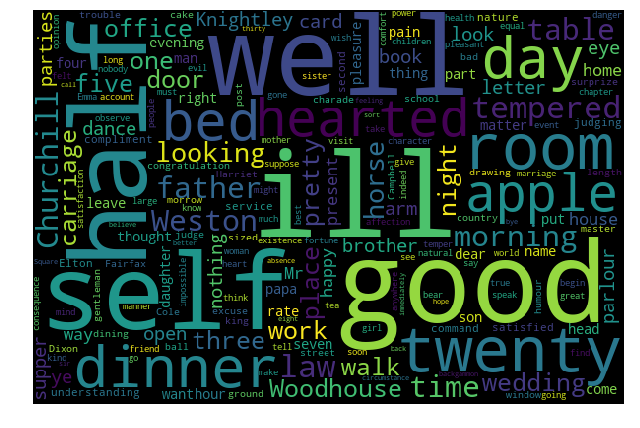

In [10]:
# visualizing our vocab with a word cloud.
from wordcloud import WordCloud
# Generate a word cloud image for positive reviews
str=''
for strings in vocab:
     str=str+strings+' '
polarity_pos_wordcloud = WordCloud(width=600, height=400).generate(str)
plt.figure( figsize=(9,9))
plt.imshow(polarity_pos_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

####  GETTING EMBEDDIING FOR A PARTICULAR WORD

In [11]:
# vector of a particular model. note that it is 100 dimensional as specified.
w2v_model.wv.get_vector('little')

array([ 0.22594933, -0.3661944 , -0.5262649 , -0.35412163,  0.48457986,
       -0.08149096,  0.43814617,  0.29576415, -0.24222276,  0.29466143,
        0.32083383,  0.41631195, -0.07116961,  0.80671185,  0.1699918 ,
       -0.2955319 , -0.04190106,  0.40572676, -0.1932512 , -0.4095728 ,
        0.10119089,  0.27874106, -0.3809369 , -0.08394723,  0.35358107,
        0.16816618, -0.4385032 , -0.4891091 , -0.7503038 ,  0.51827323,
       -0.38056457, -0.26459298, -0.18017426,  0.42219645,  0.48322195,
        0.02845879,  0.01976202, -0.3932274 ,  0.35847774, -0.40851563,
       -0.00771897, -0.00766214, -0.19018427,  0.28705359, -0.9442771 ,
        0.15830648,  0.04424557, -0.7118617 , -0.12376329, -0.78454167,
        0.0819955 ,  0.23177357,  0.15797709,  0.6745815 ,  0.00110599,
       -0.5962361 ,  0.29960954,  0.16520889, -0.05487452, -0.10514425,
       -0.327882  ,  0.6976179 , -0.5896761 ,  0.35511518, -0.30019256,
        0.46135575,  0.58553874,  0.17158884,  0.12109368, -0.17

In [12]:
# can also do like this.
w2v_model.wv.word_vec('Taylor')

array([ 0.9342139 , -0.20331186,  0.1700154 , -0.21622458, -0.08183213,
        0.24452634,  0.02702049,  0.12372004,  0.59930205,  0.2922528 ,
        0.36122966, -0.23821495, -0.03249463,  0.22675134, -0.13897553,
       -0.56035995,  0.12729569,  0.02616749,  0.05834335, -0.15893045,
       -0.45307282, -0.50519407, -0.20069247,  0.05298881,  0.41398013,
       -0.6398036 ,  0.10823217, -0.29848695,  0.41353023,  0.3306007 ,
       -0.23075497, -0.07066769,  0.37044218, -0.04270357,  0.04261634,
        0.11508162, -0.2834656 ,  0.08721089, -0.26088598, -0.44509777,
        0.5374989 ,  0.16664636, -0.2507114 , -0.12591094,  0.19756769,
       -0.04658758, -0.10671972,  0.18744595,  0.20388152,  0.16709758,
        0.28808802,  0.39834213, -0.54106927, -0.19121777,  0.14604358,
        0.00154646,  0.17694137,  0.0783986 , -0.05540533, -0.03989267,
       -0.49645385,  0.6290585 ,  0.12947103,  0.21602331, -0.28608304,
        0.27942988,  0.13333987,  0.28543913, -0.4062873 , -0.76

#### MOST SIMILAR WORDS TO A GIVEN WORD

In [13]:
# most similar words to a given word
w2v_model.wv.most_similar('Miss',topn=10)

# also u can use
#w2v_model.wv.similar_by_word('Miss',topn=5)

[('Bates', 0.7214919924736023),
 ('induce', 0.6763690710067749),
 ('Woodhouse.', 0.6744638681411743),
 ('niece', 0.6724903583526611),
 ('hurried', 0.6698253154754639),
 ('Coxes', 0.6678134202957153),
 ('pianoforte', 0.6618556976318359),
 ('quitted', 0.6587972640991211),
 ('Nash', 0.6569526791572571),
 ('civil', 0.6551186442375183)]

#### SIMALARITY b/w TWO GIVEN WORDS

In [14]:
# simalarity between two words
w2v_model.wv.similarity('beloved','friend')

0.3976543021518793

In [15]:
# simalarity between two words. dissimilar words
w2v_model.wv.similarity('equal','gentle')

0.5437039507985828

In [16]:
# simalarity between two SAME words
w2v_model.wv.similarity('equal','equal')

1.0

#### SAVING AND LOADING THE MODEL.

In [17]:
# saving the model
w2v_model.save('w2v_model.pickle')
model = Word2Vec.load('w2v_model.pickle')

# summary of the word2vec model
print(model)
print(w2v_model)

# save_word2vec_format can also be used.

Word2Vec(vocab=8283, size=100, alpha=0.025)
Word2Vec(vocab=8283, size=100, alpha=0.025)


#### VISUALIZING USING t-SNE & PLOTLY

In [18]:
embed_matrix=[]
for word in vocab:
  embed_matrix.append(w2v_model.wv.get_vector(word))
  

In [20]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
T = tsne.fit_transform(embed_matrix)
 
import plotly.plotly as py
import plotly.graph_objs as go

import plotly.plotly as py
py.sign_in('mrc03', 'V3rVgtDnmk7m6JVkizOa')  # sign in on site before and generate API key.
 
# Create a trace
trace = go.Scatter(
    x = T[:,0],
    y = T[:,1],
    mode ='markers',
    text=list(w2v_model.wv.vocab)
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

